In [ ]:
import pandas as pd
import re
import decimal
D = decimal.Decimal

def make_parser(cls):
    def parse_commas(text):
        return cls(re.sub(r'[^-+\d.]', '', text))
    return parse_commas

to_int = make_parser(int)
to_decimal = make_parser(D)

df = pd.read_csv('https://raw.githubusercontent.com/oheag2/UCDDataAnalytics/main/work_life.csv', na_values="-", converters={4: to_decimal, 5: to_decimal, 9: to_decimal, 10: to_decimal, 11: to_decimal}, index_col=0)
df.info()


# import matplotlib.pyplot as plt
# fig, ax = plt.subplots()
# ax.plot(df["Minimum Vacations Offered (Days)"], df["TOTAL SCORE"])
# plt.show()

df.head()

#import my csv file from github and then print the head to make sure it imported ok/looks ok
#as there are a number of percentages/currencies, i want to convert these to usable numbers and then to integers or floats using a solution I found on Stackoverflow (see References)
#create pandas dataframe

#using a mix of navalues and the code above from stack overflow, all the numbers i need are now floats, aaprt from a few currencies and a percentage which ill deal with shortly'

In [ ]:
df.head()

#check the import looks ok

In [ ]:
#rename columns to more usable titles and check info to see new titles

df.columns = ["2021", "city", "country", "remotejob_pcnt", "overworked_pcnt", "vacdays_offered", "vacdays_taken", "unemployment", "multjob_pcnt", "inflation_pcnt", "parental_leave", "covid_impact", "covid_support", "healthcare", "mental_healthcare", "inclusivity", "affordability", "happiness", "city_safety", "outdoor_space", "air_qual", "wellness", "total_score"]
df.info()


In [119]:
# df = df.rename(index={'2022': 'Rank in 2022'}, inplace=True

In [133]:
df[["remotejob_pcnt", "overworked_pcnt", "multjob_pcnt", "inflation_pcnt", "parental_leave"]] = df[["remotejob_pcnt", "overworked_pcnt", "multjob_pcnt", "inflation_pcnt", "parental_leave"]].apply(pd.to_numeric)

In [ ]:
df.info()

In [ ]:
df

In [134]:
df = df.drop(columns='2021')

In [ ]:
df

In [136]:
#check for null values

df.isnull().sum()

city                 0
country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
vacdays_taken        3
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

In [140]:
import numpy as np

df['vacdays_taken'].mean()
df['vacdays_taken'] = df['vacdays_taken'].replace(np.nan, 15.0)

In [141]:
df.isnull().sum()

city                 0
country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
vacdays_taken        0
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

In [ ]:
df.groupby('country').agg(['mean', 'median'])

In [87]:
df.groupby(['vacdays_offered', 'vacdays_taken', 'total_score'])

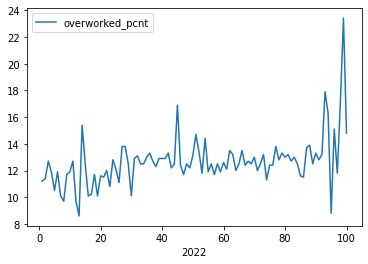

In [126]:
df[['overworked_pcnt']].plot()

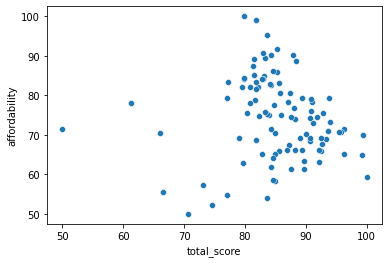

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=df, x='total_score', y='affordability');

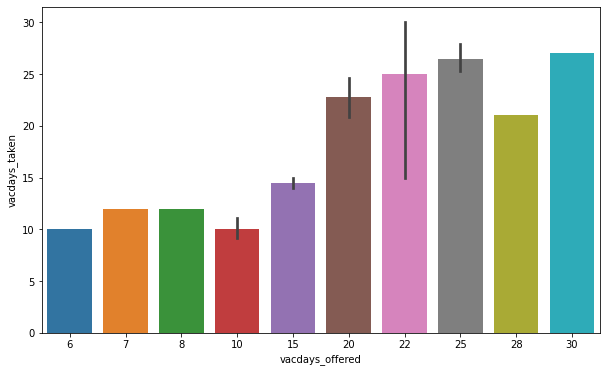

In [142]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'vacdays_offered', y = 'vacdays_taken', data = df)

# df.plot(kind='line',x='vacdays_offered',y='overworked_pcnt',color='yellow')
# # plt.bar('sunshine)', 'life_expect', data=dfsun)
# plt.show()

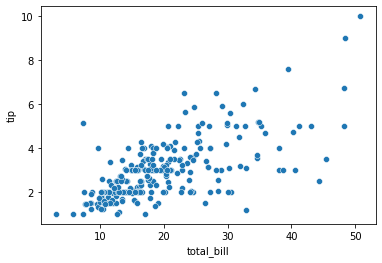

In [ ]:
sns.scatterplot(data=tips, x='total_bill', y='tip');

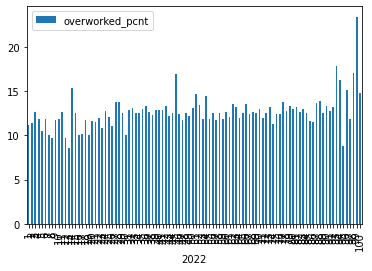

In [125]:
df[['overworked_pcnt']].plot.bar()

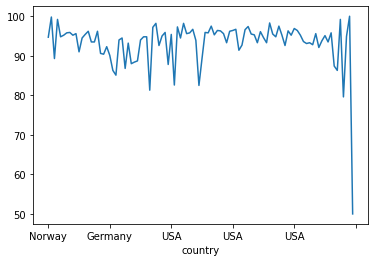

In [ ]:
# countries_grouped = df.groupby(['country']).mean()
# print(countries_grouped)

# df.set_index('country', inplace=True)
# df[['healthcare']].plot()

#sets country as the index and plots healthcare

# unemployment_grouped = df.groupby(['unemployment']).mean()
df['unemployment'].plot()

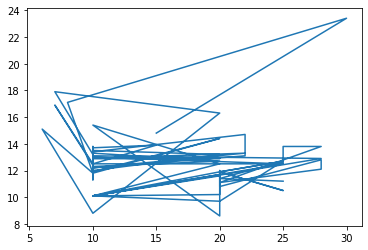

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#plt.plot('Minimum Vacations Offered (Days)','Overworked Population')
#plt.show()

fig, ax = plt.subplots()
ax.plot(df['vacdays_offered'], df['overworked_pcnt'])
plt.show()


In [ ]:
df.isnull().sum()

2022                 0
city                 0
country              0
remotejob_pcnt       0
overworked_pcnt      0
vacdays_offered      0
unemployment         0
multjob_pcnt         0
inflation_pcnt       0
parental_leave       0
covid_impact         0
covid_support        0
healthcare           0
mental_healthcare    0
inclusivity          0
affordability        0
happiness            0
city_safety          0
outdoor_space        0
air_qual             0
wellness             0
total_score          0
dtype: int64

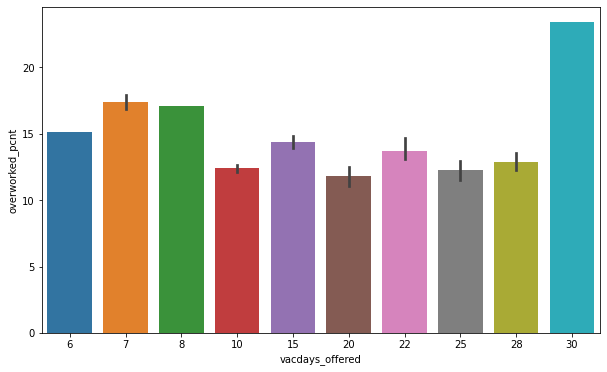

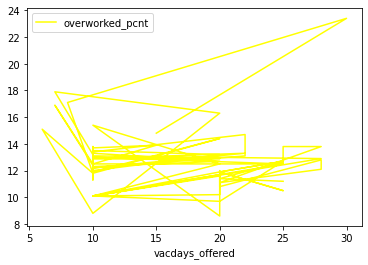

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'vacdays_offered', y = 'overworked_pcnt', data = df)

df.plot(kind='line',x='vacdays_offered',y='overworked_pcnt',color='yellow')
# plt.bar('sunshine)', 'life_expect', data=dfsun)
plt.show()

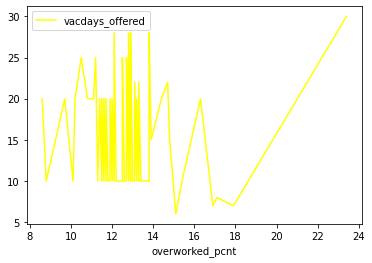

In [ ]:
dfwork=df.sort_values(["overworked_pcnt", "vacdays_offered"])
dfwork.plot(kind='line',x='overworked_pcnt',y='vacdays_offered',color='yellow')

